In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Sreemanto/DSP-55/main/sonar_signal.csv')
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [86]:
df.shape

(208, 61)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [79]:
df.f60.replace(['R','M'],[1,0],inplace=True)

In [80]:
X = df.iloc[:,:-1]
y = df.f60

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [85]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(156, 60)
(52, 60)
(156,)
(52,)


In [87]:
y_train

50     1
55     1
77     1
23     1
45     1
      ..
144    0
118    0
189    0
206    0
99     0
Name: f60, Length: 156, dtype: int64

In [88]:
KNN_1 = KNeighborsClassifier(n_neighbors=1)

KNN_1.fit(X_train,y_train)

actual = y_test

predicted = KNN_1.predict(X_test)

In [89]:
print('Accuracy for k=1', metrics.accuracy_score(y_test, predicted))

Accuracy for k=1 0.8269230769230769


In [90]:
KNN_3 = KNeighborsClassifier(n_neighbors=3)

KNN_3.fit(X_train,y_train)

actual = y_test

predicted = KNN_3.predict(X_test)

In [91]:
print('Accuracy for k=3', metrics.accuracy_score(y_test, predicted))

Accuracy for k=3 0.8269230769230769


In [92]:
KNN_5 = KNeighborsClassifier(n_neighbors=5)

KNN_5.fit(X_train,y_train)

actual = y_test

predicted = KNN_5.predict(X_test)

In [93]:
print('Accuracy for k=5', metrics.accuracy_score(y_test, predicted))

Accuracy for k=5 0.7692307692307693


Applying K-FOLD CROSS VALIDATION

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
KNN_1 = KNeighborsClassifier(n_neighbors=1)

Accuracy = cross_val_score(KNN_1, X, y, cv=10, scoring='accuracy')
# returns accuracy of 10 different test folds
Accuracy

array([0.52380952, 0.80952381, 0.85714286, 0.42857143, 0.47619048,
       0.52380952, 0.52380952, 0.71428571, 0.45      , 0.75      ])

In [98]:
Accuracy.mean()*100

60.57142857142858

In [99]:
KNN_5 = KNeighborsClassifier(n_neighbors=5)
Accuracy = cross_val_score(KNN_5, X, y, cv=10, scoring='accuracy')
Accuracy.mean()*100

59.523809523809526

In [100]:
Range = list(range(1,30))
l1 = []

for i in range(1,30):
    KNN = KNeighborsClassifier(n_neighbors=i)
    Accuracy = cross_val_score(KNN, X, y, cv= 10, scoring='accuracy').mean()*100
    
    l1.append(Accuracy)

In [101]:
l1

[60.57142857142858,
 61.11904761904763,
 59.523809523809526,
 60.0,
 59.523809523809526,
 57.61904761904761,
 57.57142857142858,
 55.11904761904762,
 55.547619047619044,
 55.571428571428584,
 56.02380952380952,
 58.54761904761905,
 60.92857142857142,
 62.904761904761905,
 60.45238095238095,
 64.85714285714286,
 62.45238095238095,
 63.42857142857142,
 60.476190476190474,
 61.47619047619048,
 60.02380952380953,
 61.00000000000001,
 58.07142857142858,
 59.54761904761905,
 59.54761904761905,
 58.61904761904761,
 59.07142857142858,
 60.523809523809526,
 58.07142857142858]

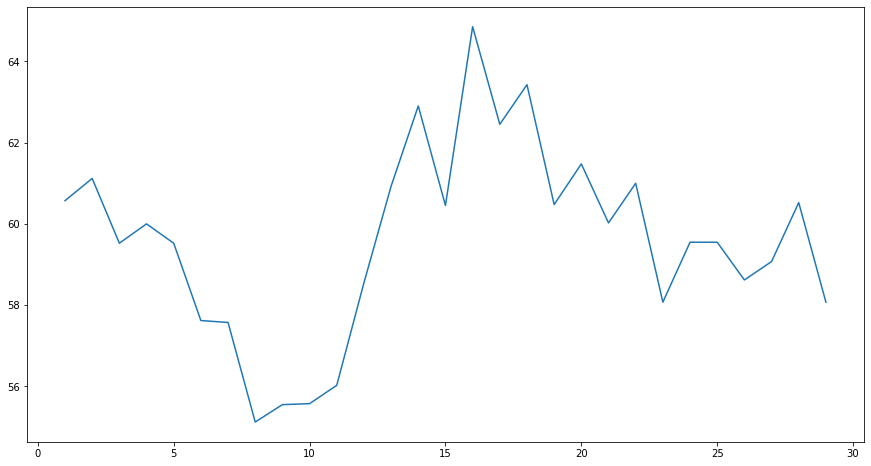

In [102]:
plt.figure(figsize=(15,8))
plt.plot(Range, l1)